Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
import pandas as pd
import numpy as np 

# Set my index as the gameId col 
df = pd.read_csv('https://raw.githubusercontent.com/timrocar/Unit-2-Build/master/high_diamond_ranked_10min.csv',
                 index_col='gameId')

In [2]:
print(df.shape)
df.head()

(9879, 39)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
#lowercase column headers for ease of typing
df.columns = map(str.lower, df.columns)
df.dtypes

bluewins                          int64
bluewardsplaced                   int64
bluewardsdestroyed                int64
bluefirstblood                    int64
bluekills                         int64
bluedeaths                        int64
blueassists                       int64
blueelitemonsters                 int64
bluedragons                       int64
blueheralds                       int64
bluetowersdestroyed               int64
bluetotalgold                     int64
blueavglevel                    float64
bluetotalexperience               int64
bluetotalminionskilled            int64
bluetotaljungleminionskilled      int64
bluegolddiff                      int64
blueexperiencediff                int64
bluecspermin                    float64
bluegoldpermin                  float64
redwardsplaced                    int64
redwardsdestroyed                 int64
redfirstblood                     int64
redkills                          int64
reddeaths                         int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 4519157822 to 4523772935
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bluewins                      9879 non-null   int64  
 1   bluewardsplaced               9879 non-null   int64  
 2   bluewardsdestroyed            9879 non-null   int64  
 3   bluefirstblood                9879 non-null   int64  
 4   bluekills                     9879 non-null   int64  
 5   bluedeaths                    9879 non-null   int64  
 6   blueassists                   9879 non-null   int64  
 7   blueelitemonsters             9879 non-null   int64  
 8   bluedragons                   9879 non-null   int64  
 9   blueheralds                   9879 non-null   int64  
 10  bluetowersdestroyed           9879 non-null   int64  
 11  bluetotalgold                 9879 non-null   int64  
 12  blueavglevel                  9879 non-null   f

In [5]:
#I have no null values, great to see! 

In [6]:
# with the help of some previous domain knowledge, I can see there are
# many repeated columns( many events on one team are inversely correlated to the other)
# I will start by removing some of them .
repeated = ['redfirstblood', 'redkills', 'reddeaths', 'redelitemonsters', 'redgolddiff',
            'redexperiencediff' ]
df = df.drop(repeated, axis=1)

In [7]:
#bluewins will be my target 
df.bluewins.value_counts()

0    4949
1    4930
Name: bluewins, dtype: int64

In [8]:
#bluewins is a classification problem, it is binary(1,0)
# I will use accuracy as my metric
# I will probably just use a ramndom 80/20 train-validation split, will not excluse any observations. 

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

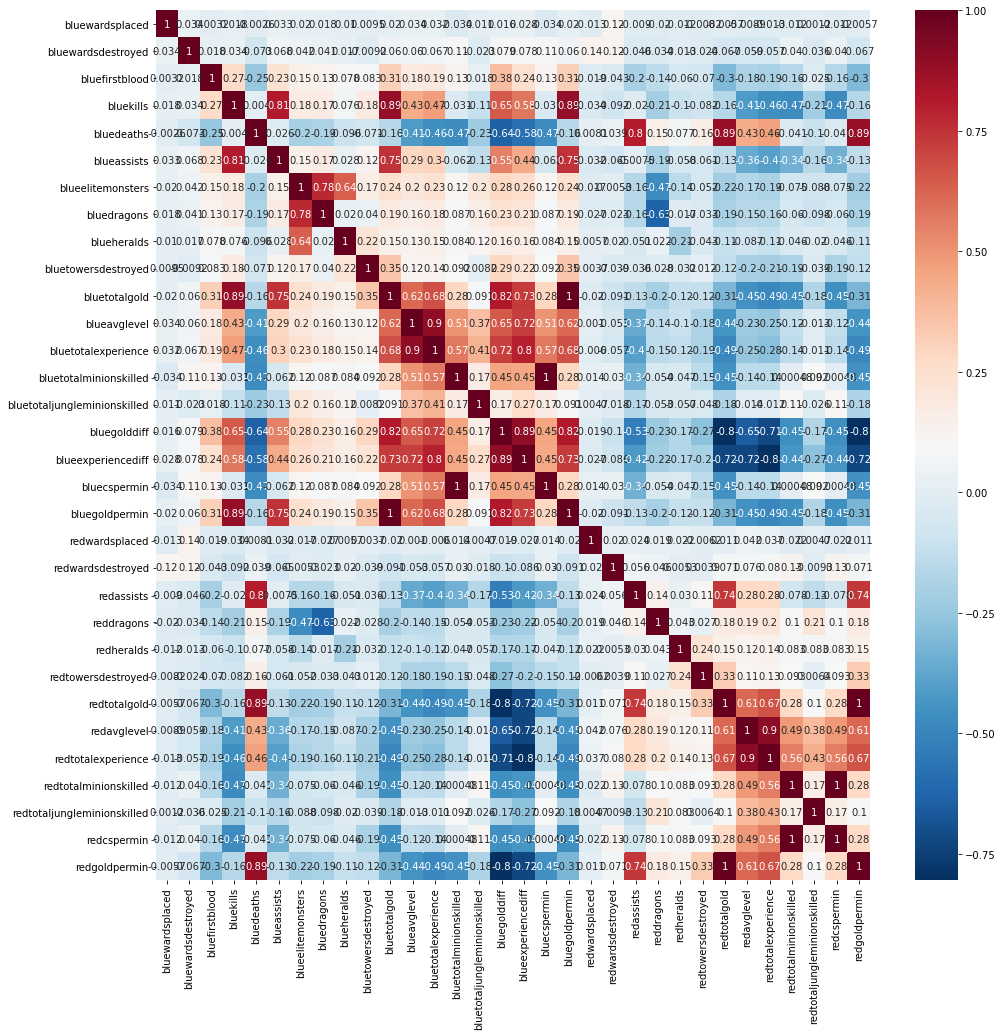

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(df.drop('bluewins', axis=1).corr(), cmap="RdBu_r", annot =True)
plt.show()